In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
X = np.arange(0 , 1.1, 0.1)
t = np.array([0.15, -0.16, -0.61, -0.86, -1.02, -0.44, -.16, 0.05, 0.45, 1.39, 0.86])

In [24]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(X)

model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(10, activation='tanh'),
      tf.keras.layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

history = model.fit(
    X,
    t,
    epochs=10000,
    verbose= 0,
    callbacks=callback
    )

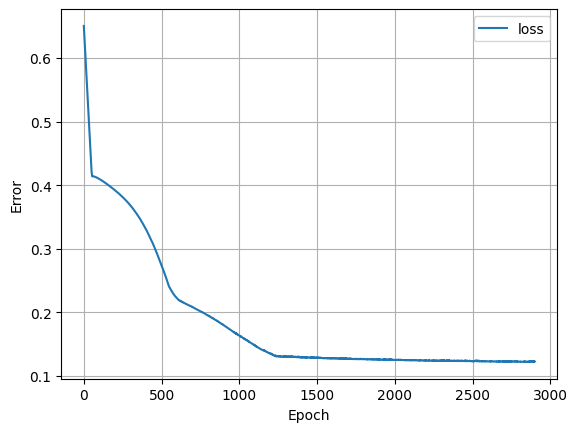

In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history)


b)

In [27]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(X)

model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(10, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
      tf.keras.layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

history = model.fit(
    X,
    t,
    epochs=10000,
    verbose= 0,
    callbacks=callback
    )

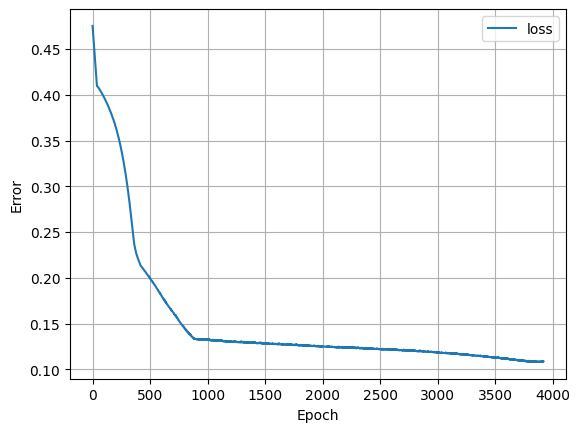

In [29]:
plot_loss(history)

c)

In [36]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(X)

model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(10, activation='tanh'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

history = model.fit(
    X,
    t,
    epochs=10000,
    verbose= 0,
    callbacks=callback
    )

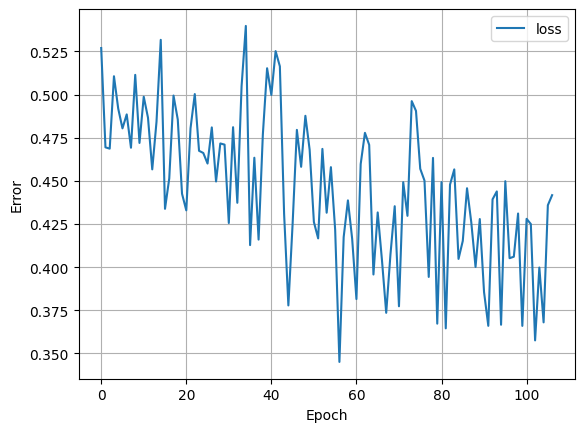

In [38]:
plot_loss(history)

2

a) is good 🤌
- not converged
- ~ 86% Acc, ~ 1.60 loss
- 🤌
- ~ 500/1200 correct preds for 9, ~ 800/1200 correct preds for 5. rest are good

b) is better 🤌
- Changed optimizer to adam
- ~ 99.35% Acc, ~1.46 loss
- experiment 🤌

c)
- helps look at overlaps in data. predictions look different because of overlap. 